In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
x=tf.range(-200,200,4)
y=tf.range(-190,210,4)

In [ ]:
len(x),len(y)

(100, 100)

In [ ]:
x_train=x[:70]
y_train=y[:70]

x_test=x[70:]
y_test=y[70:]

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(70, 30, 70, 30)

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(x_train,y_train,epochs=1350,verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
x_predict=model.predict(x_test)

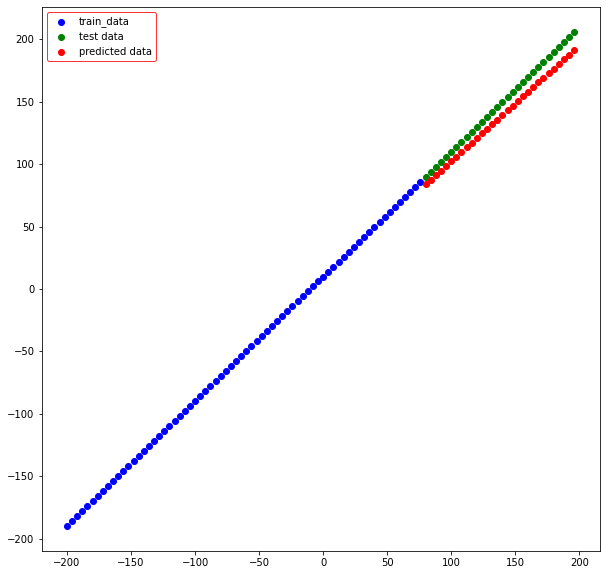

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,c="b",label="train_data")
plt.scatter(x_test,y_test,c="g",label="test data")
plt.scatter(x_test,x_predict,c="r",label="predicted data")
plt.legend(edgecolor="r")

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_images),len(train_labels),len(test_images),len(test_labels)

(60000, 60000, 10000, 10000)

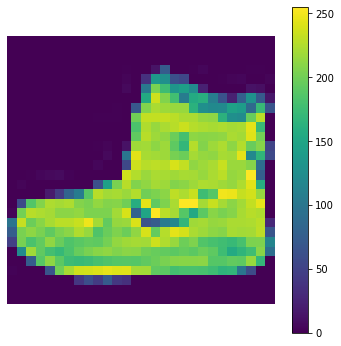

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[0])
plt.colorbar()
plt.axis("off");
# plt.grid(True)
plt.show()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

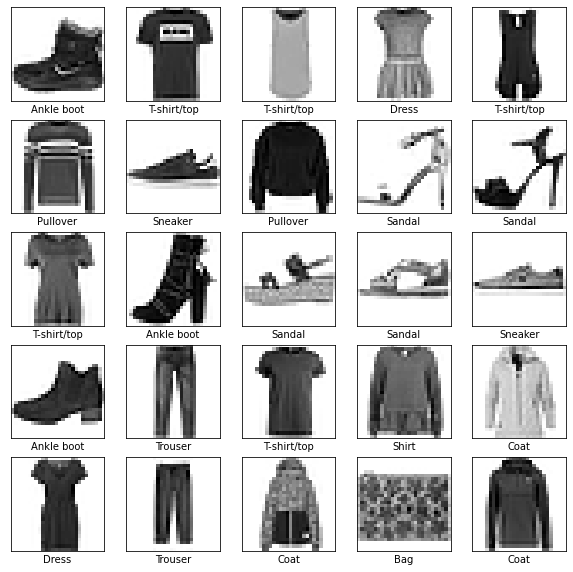

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(128,activation="relu"),
                           tf.keras.layers.Dense(10)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.5763 - accuracy: 0.6773
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7875 - accuracy: 0.7044
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6890 - accuracy: 0.7305
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6497 - accuracy: 0.7375
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6273 - accuracy: 0.7424
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6133 - accuracy: 0.7452
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6107 - accuracy: 0.7493
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5973 - accuracy: 0.7551
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5773 - accuracy: 0.7801
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.558

In [ ]:
nat=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.5986 - accuracy: 0.7872


In [ ]:
probabiliy_model=tf.keras.Sequential([model,
                                      tf.keras.layers.Softmax()
])

In [ ]:
predictions=probabiliy_model.predict(test_images)

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

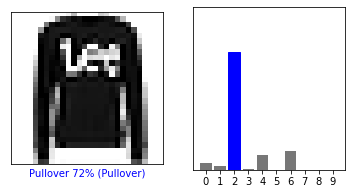

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

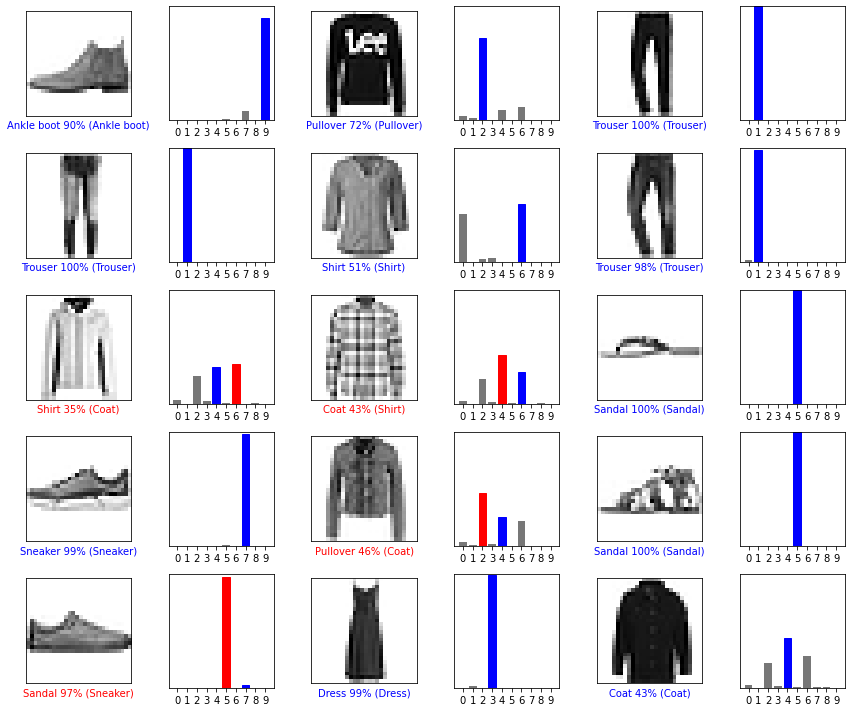

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

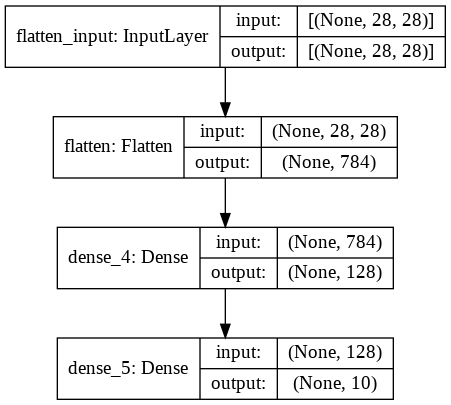

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
ya=np.argmax(predictions[i])

In [ ]:
predictions[1]

array([4.0706087e-02, 2.3600295e-02, 7.2037137e-01, 6.4082518e-03,
       9.2227310e-02, 3.5695572e-04, 1.1537247e-01, 1.3957030e-11,
       9.5718302e-04, 6.2231642e-08], dtype=float32)

In [ ]:
np.argmax(predictions[1])

2

In [ ]:
model.save("my first image model")

INFO:tensorflow:Assets written to: my first image model/assets


In [ ]:
export=tf.keras.models.load_model("/content/my first image model")

In [ ]:
export.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
medical=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split 

In [ ]:
medical.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [ ]:
machan=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
x=medical.drop("charges",axis=1)
y=medical["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
machan.fit(x_train,y_train)
x_train_normal=machan.transform(x_train)
x_test_normal=machan.transform(x_test)

In [ ]:
x_train,x_train_normal

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

In [ ]:
x_test,x_test_normal

(      age     sex     bmi  children smoker     region
 764    45  female  25.175         2     no  northeast
 887    36  female  30.020         0     no  northwest
 890    64  female  26.885         0    yes  northwest
 1293   46    male  25.745         3     no  northwest
 259    19    male  31.920         0    yes  northwest
 ...   ...     ...     ...       ...    ...        ...
 109    63    male  35.090         0    yes  southeast
 575    58  female  27.170         0     no  northwest
 535    38    male  28.025         1     no  northeast
 543    54  female  47.410         0    yes  southeast
 846    51  female  34.200         1     no  southwest
 
 [268 rows x 6 columns],
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.4

In [ ]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
medical_dum=pd.get_dummies(medical)

In [ ]:
medical.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
medical_dum.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0


In [ ]:
medical_dum.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [ ]:
medical_dum["bmi"]=medical_dum["bmi"].astype("int")

In [ ]:
medical_dum.dtypes

age                   int64
bmi                   int64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [ ]:
medical_dum

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25,0,2007.94500,1,0,1,0,0,0,0,1
